# Analyse if number of bootstrapping iterations is sufficient

- check ROC-AUC & PR values
- should show a normal distribution

In [4]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

In [5]:
PATH = "/home/WUR/katz001/PROJECTS/myaReg-genderDifferences"

target = "gender"
percentBoruta = 100
varSet = "fullRegistry"

vars = f"{target}_bootstrapped_iterativeBoruta_{percentBoruta}perc"
varPath = f"{PATH}/results/20_featureSelection/{varSet}/boruta/{vars}.txt"

resultsPath = f"{PATH}/results/30_internalValidation/{varSet}/{vars}"
folderFigures = f"{PATH}/figures/30_internalValidation/{varSet}/{vars}"

''' Load Data '''

model = 'rfc'
n_iter = 300
with open(f'{resultsPath}/bootstrap_{model}_n{n_iter}_qc.pickle', 'rb') as f:
    dic_summary = pickle.load(f)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

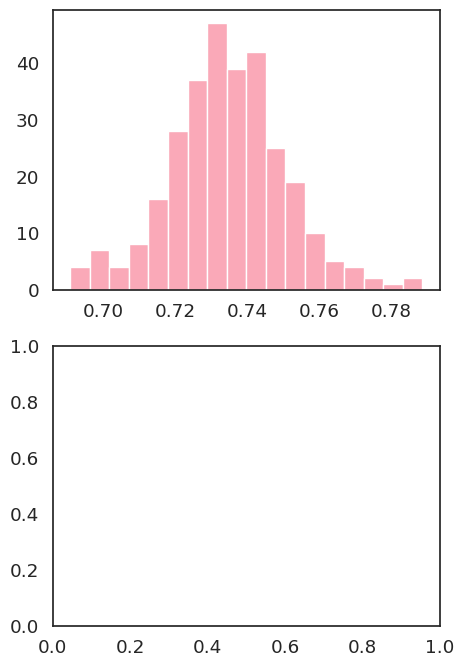

In [7]:
sns.set_theme(style="white", font_scale=1.2)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,8))
df = pd.DataFrame.from_dict(dic_summary).T
sns.histplot(data=df["auc"], ax=ax1, alpha=0.6, kde=True, kde_kws={"bw_adjust":0.8}, color=sns.husl_palette()[0])
sns.histplot(data=df["average_prec"], ax=ax2, alpha=0.6, kde=True, kde_kws={"bw_adjust":0.8}, color=sns.husl_palette()[1])
ax1.vlines(np.percentile(df["auc"], 2.5), ymin=0, ymax=50, linestyles='--', color='gray', alpha=0.6)
ax1.vlines(np.percentile(df["auc"], 97.5), ymin=0, ymax=50, linestyles='--', color='gray', alpha=0.6, label="CI (95%)")
ax2.vlines(np.percentile(df["average_prec"], 2.5), ymin=0, ymax=40, linestyles='--', color='gray', alpha=0.6)
ax2.vlines(np.percentile(df["average_prec"], 97.5), ymin=0, ymax=40, linestyles='--', color='gray', alpha=0.6)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_title("ROC - AUC")
ax2.set_title("PR")
fig.legend()
plt.tight_layout()
#plt.savefig(f"{folderFigures}/bootstrapping_n{n_iter}.png", dpi=300)

In [ ]:
df